# * Plotting Categorical Data *

## When the variables under consideration are numeric, visualization is made easier with the help of scatterplots or line graphs. (Reference: https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial)

## However when the data is categorical, we need a more specialized approach to visualization. (Reference: https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial)

## The seaborn package has a dedicated function for plotting categorical data- referred to as "catplot()". 

# * Tips Dataset: *
### Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all cus- tomers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks", color_codes=True)

In [12]:
tipsDF = sns.load_dataset("tips")    
print(type(tipsDF))                         # Its a pandas dataframe
print(tipsDF.columns)                       # Fetch the column names
print(tipsDF.head())                        # Fetch the first few columns 

# Observe that the columns "sex", "smoker", "day" and "time" are all categorical. 
# While the variables "total_bill", "tip" and "size" are numeric


<class 'pandas.core.frame.DataFrame'>
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


4
0      Sun
19     Sat
77    Thur
90     Fri
Name: day, dtype: category
Categories (4, object): [Thur, Fri, Sat, Sun]


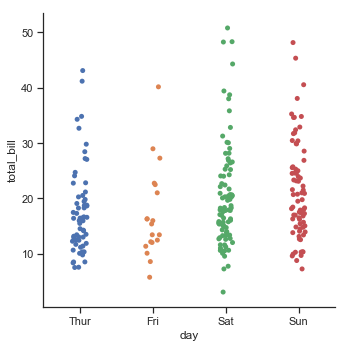

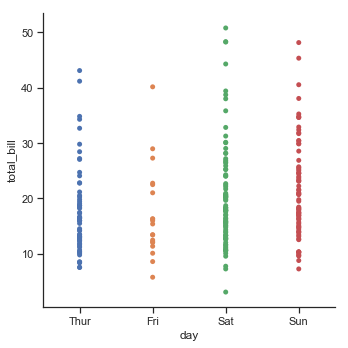

In [17]:
# Lets plot a graph between "day" vs. "total_bill".
# First count the number of unique days in the dataset
print(tipsDF.day.nunique())                     # 4... There are 4 unique values in that column
print(tipsDF.day.drop_duplicates())             # To get the actual column kunique values along with respective count

# Plot
sns.catplot(x="day", y="total_bill", data=tipsDF)

# Inference: Here we try to represent categorical data with scatter plot. Here all the points to the same category(in our case the 
# 'day' of the week, will be alligned along the axis corresponding to the categorical variable. This axis is referred to as the 
# 'CATEGORICAL AXIS'. The default strategy of catplot() is to add a small amount of random "jitter" in order to position the points. 
# The 'jitter' provides a better visualization.)

# Lets see the visualization sans 'jitter'
sns.catplot(x="day", y="total_bill", jitter= False, data=tipsDF)

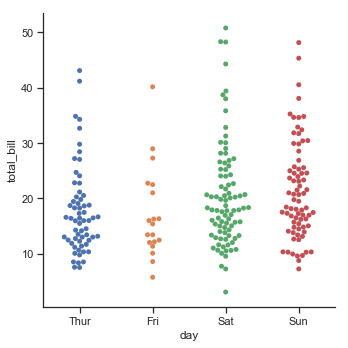

In [19]:
# Another variant of the catplot() is the 'beeswarm' or sometimes referred to as the 'swarmplot()'. This plot is activated 
# by setting, the kind ="swarm" attribute. 
# The underlying algorithm of this method, ensures that the points do not overlap each other. Thus it is a better representation 
# of the observations. However, this method is suitable only for smaller data sets. 
sns.catplot(x="day", y="total_bill", kind="swarm", data=tipsDF)

# * Adding a second dimension to the categorical plot *
## Its possible to add another dimension to the categorical plot, using the "hue" attribute. 
### For Example: Lets visualize total_bill payments on different days of the week and made by different genders. 

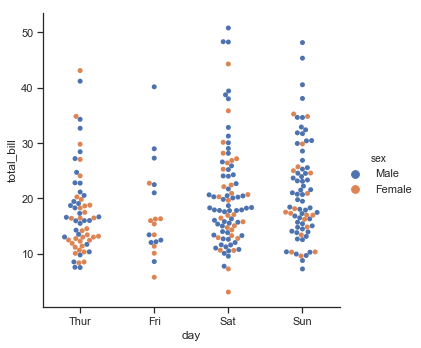

In [21]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tipsDF)

# Plot a categorical variable while maintaining a order -
## If the variable passed to the categorical axis looks numerical, the levels will be sorted automatically. We can also be selective as which levels to be included/ excluded. 
## As a good practice, always check the data type of the variables within the pandas data frame. 

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


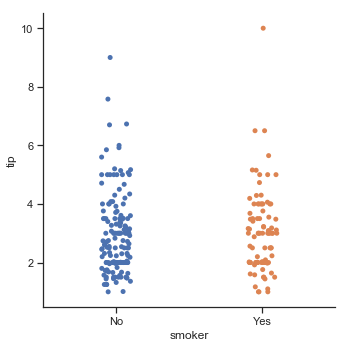

In [27]:
print(tipsDF.dtypes)                                                      # check the data types. "Smoker" is <Category>.

# Specify explicit order
sns.catplot(x="smoker", y="tip", order=["No","Yes"], data=tipsDF)         # Here you have explicitly specified the order.

# Changing the categorical axis.
## By default, we assume the horizontal axis as the categorical axis. But at times it is helpful, to change this notion and convert the cateforical axis to vertical or y-axis. 

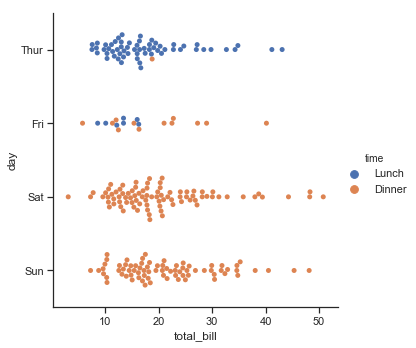

In [28]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tipsDF)

# Observe distribution of observations within categories
## Just like numerical or quantitative data, for categorical data too, we can fetch the distributional information. 

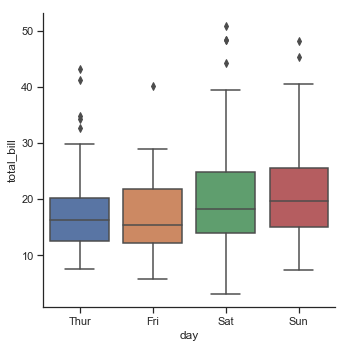

In [29]:
sns.catplot(x="day", y="total_bill", kind="box", data=tipsDF)

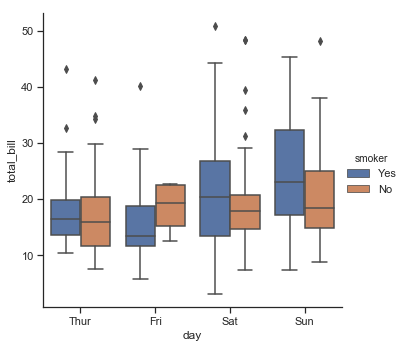

In [30]:
# Adding a second dimension using the "hue" attribute
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tipsDF)